# K-Nearest-Neighbors
 
K-Nearest-Neighbors is a **supervised** Machine Learning algorithm. It can be used for classification and regression.
Regardless of its use, the input consists of the k closest training examples in the feature space. 
The output can be a class membership for classification or a value for regression.


## Classification Algorithm

The training examples are multidimensional vectors, each with a class label. The algorithm consists in two steps:
Training and Classification.

1. **Training**. This step of the algorithm consists only of storing the feature vectors and class labels of the training samples.

2. **Classification**. In the step a k constant value and an unlabeled vector of points (testing points) are given by the user. 
The points are classified by assigning the label which is most frequent among the k training samples nearest to the test points.

A commonly used distance metric for continuous variables is Euclidean distance. https://en.wikipedia.org/wiki/Euclidean_distance

![KMeans](img/KNN.png)


## Classification Algorithm Code

In [1]:
import math
import operator
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


	# =================
	# = Training Step =
	# =================

training_data = {
	"Class 1": [[90, 90], [85, 77], [77, 93], [80, 87], [95, 88], [100, 79], [74, 75], [70, 73], [93, 85], [97, 77],
		[100, 81], [86, 84], [72, 86], [94, 76], [85, 96], [80, 73], [87, 79], [82, 84], [95, 77], [80, 97], [76, 95],
		[84, 78], [92, 81], [73, 82], [97, 82], [79, 79], [81, 79], [80, 100], [78, 77], [89, 77], [74, 98]],
	"Class 2": [[78, 48], [74, 46], [73, 64], [66, 61], [83, 48], [70, 51], [68, 47], [78, 55], [78, 60], [85, 49],
		[82, 45], [73, 64], [76, 61], [79, 50], [78, 60], [80, 60], [77, 62], [70, 43], [75, 45], [79, 57], [74, 57],
		[67, 61]],
	"Class 3": [[42, 70], [44, 93], [65, 72], [54, 79], [49, 71], [52, 86], [38, 97], [67, 87], [46, 75], [62, 95],
		[65, 78], [67, 82], [63, 96], [57, 74], [53, 76], [43, 96], [67, 96], [56, 74], [59, 99], [47, 86], [49, 92],
		[58, 91], [42, 80], [61, 99], [66, 73], [61, 73], [53, 89], [52, 94], [46, 91], [51, 80], [67, 92], [55, 80],
		[46, 83], [44, 98]]}


	# =======================
	# = Classification Step =
	# =======================

def k_nn_calssification(training_data, k_list):
	"""
	Collect all points in a single list.
	:param training_data: Labeled data for training.
	:param k_list: Labeled data for training.
	:return: A List containing all data.
	"""
    # Get all training points in a single list.
	all_train_points = flat_training_points(training_data)

	classification_results = []

    # Classify each testing point.
	for testing_point in testing_data:
		results = []
		classification_results.append(results)
		results.append(repr(testing_point))
		distances = {}

		# Calculate the Euclidean distance of the testing point with all points in the training set.
		for train_point in all_train_points:
			distances[repr(train_point)] = euclidean(testing_point, train_point)

		# Sort training points by distance.
		sorted_training_points = pd.Series(distances).sort_values(
					axis=0, 
					ascending=True, 
					kind='quicksort', 
					na_position='last')

		# Iterate through the k list to label the testing point.
		for k in k_list:
			# Get the K-Nearest-Neighbors.      
			knn = sorted_training_points[:k].index

			# Get the K-Nearest-Neighbors votes. 
			class_vote = defaultdict(lambda: 0)
			for nn in knn:
				for class1 in training_data:
					if eval(nn) in training_data[class1]:
						class_vote[class1] += 1

			# Sort classes by votes. 
			sorted_dict = dict(sorted(class_vote.items(), key=operator.itemgetter(1), reverse=True))
			# Store the class with more votes. 
			results.append(list(sorted_dict.keys())[0])

	return classification_results


def euclidean(vector1, vector2):
	"""
	Calculate the Euclidean Distance between two vectors.
	:param vector1: Vector 1.
	:param vector2: Vector 2.
	:return: The distance between two vectors.
	"""
	return math.sqrt(((np.array(vector1) - np.array(vector2)) ** 2).sum())


def flat_training_points(training_data):
	"""
	Collect all points in a single list.
	:param training_data: Labeled data for training.
	:return: A List containing all data.
	"""
	all_train_points = []

	for class1 in training_data:
		all_train_points = all_train_points + training_data[class1]
    
	return all_train_points

### Methods to Plot Data and Classes

In [2]:
def plot_classes(classes, test_points=None):
	"""
	Plot k-classes and the testing points at the class they belong.
	:param classes: The classes' data or training points.
	:param test_points: The testing points.
	"""
	print_classes_dict = []
	
	for class1 in classes:
		x_values_list = []
		y_values_list = []
		
		for point in classes[class1]:
			x_values_list.append(point[0])
			y_values_list.append(point[1])
		
		print_classes_dict.append((x_values_list, y_values_list))
	
	colors = {"Class 1": "red", "Class 2": "green","Class 3": "blue"}
	markers = {"Class 1":"o", "Class 2":"*", "Class 3": "p"}
	
	plt.rcParams["figure.facecolor"] = "#EDECE7"
	plt.rcParams["axes.facecolor"] = "#DAE1D9"
	
	index = 1
	for class1 in print_classes_dict:
		plt.scatter(class1[0],
				class1[1],
				marker=markers[f"Class {index}"],
				color=colors[f"Class {index}"],
				facecolors="none")

		index += 1


	if test_points is not None: 
		for i in test_points.index:
			point = eval(i)
			class_point = test_points[i]
			plt.scatter(point[0],
					point[1],
					marker=markers[class_point],
					color=colors[class_point],
					s=60)
        
	plt.legend(list(training_data.keys()), prop={'size': 9}, bbox_to_anchor=(1, 1))
	plt.show()


In [3]:
def plot_train_test(train_points, test_points):
	"""
	Plot k-classes and the testing points.
	:param train_points: The classes' data or training points.
	:param test_points: The testing points.
	"""
	print_classes_dict = []
	
	for class1 in train_points:
		x_values_list = []
		y_values_list = []
		
		for point in train_points[class1]:
			x_values_list.append(point[0])
			y_values_list.append(point[1])
		
		print_classes_dict.append((x_values_list, y_values_list))
	
	colors = {"Class 1": "red", "Class 2": "green","Class 3": "blue"}
	markers = {"Class 1":"o", "Class 2":"*", "Class 3": "p"}
	
	plt.rcParams["figure.facecolor"] = "#EDECE7"
	plt.rcParams["axes.facecolor"] = "#DAE1D9"
	
	index = 1
	for class1 in print_classes_dict:
		plt.scatter(class1[0],
				class1[1],
				marker=markers[f"Class {index}"],
				color=colors[f"Class {index}"],
				facecolors="none")

		index += 1


	if test_points is not None: 
		for point in test_points:
			plt.scatter(point[0],
					point[1],
					marker="o",
					color="black",
					s=60)
        
	plt.legend(list(training_data.keys()), prop={'size': 9}, bbox_to_anchor=(1, 1))
	plt.show()

### Plotting Training Data

<IPython.core.display.Javascript object>


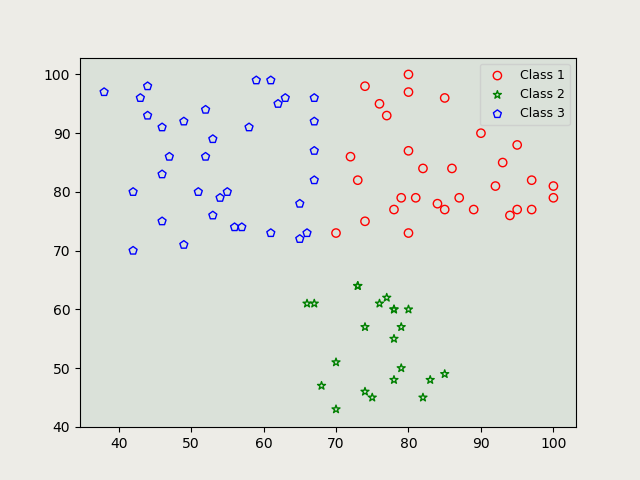

In [4]:
%matplotlib notebook
plot_classes(training_data)

### Defined Unlabeled Vector of Points

<IPython.core.display.Javascript object>


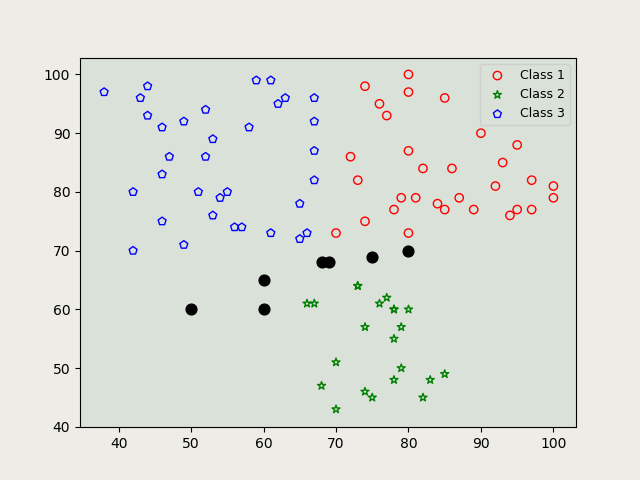

In [5]:
%matplotlib notebook

testing_data = [[50, 60], [60, 60], [80, 70], [60, 65], [69, 68], [68, 68], [75, 69]]
plot_train_test(training_data, testing_data)

### Defining k

A list of different values of k is defined.

In [6]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

### Runing K-NN Classification Algorithm

In [7]:
classification_results = k_nn_calssification(training_data, ks)

Display the results using a Pandas DataFrame

In [8]:
df = pd.DataFrame(classification_results, columns=["Point\k"] + ks).set_index("Point\k")
df

,1,2,3,4,5,6,7,8,9,10
Point\k,,,,,,,,,,
"[50, 60]",Class 3,Class 3,Class 3,Class 3,Class 3,Class 3,Class 3,Class 3,Class 3,Class 3
"[60, 60]",Class 2,Class 2,Class 2,Class 2,Class 2,Class 2,Class 2,Class 2,Class 2,Class 2
"[80, 70]",Class 1,Class 1,Class 1,Class 1,Class 1,Class 1,Class 1,Class 1,Class 1,Class 1
"[60, 65]",Class 2,Class 2,Class 2,Class 2,Class 3,Class 3,Class 3,Class 3,Class 3,Class 3
"[69, 68]",Class 1,Class 1,Class 1,Class 3,Class 2,Class 2,Class 2,Class 2,Class 2,Class 2
"[68, 68]",Class 3,Class 3,Class 3,Class 3,Class 3,Class 2,Class 3,Class 3,Class 3,Class 3
"[75, 69]",Class 2,Class 2,Class 1,Class 1,Class 1,Class 2,Class 1,Class 2,Class 2,Class 2


**Observe** some of the points classification varies as long as the number of k Nearest Neighbors increase. For instance point [69, 58], is labeld or classified as Class 1, then as Class 3 and finally as Class 2.

### Plotting Classification Results

#### k=1

Point\k
[50, 60]    Class 3
[60, 60]    Class 2
[80, 70]    Class 1
[60, 65]    Class 2
[69, 68]    Class 1
[68, 68]    Class 3
[75, 69]    Class 2
Name: 1, dtype: object


<IPython.core.display.Javascript object>


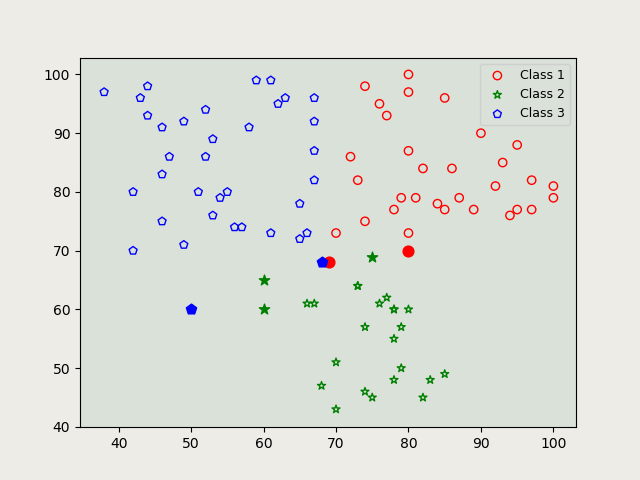

In [9]:
%matplotlib notebook

k = 1
print(df[k])
plot_classes(training_data, df[k])

#### k=4

Point\k
[50, 60]    Class 3
[60, 60]    Class 2
[80, 70]    Class 1
[60, 65]    Class 2
[69, 68]    Class 3
[68, 68]    Class 3
[75, 69]    Class 1
Name: 4, dtype: object


<IPython.core.display.Javascript object>


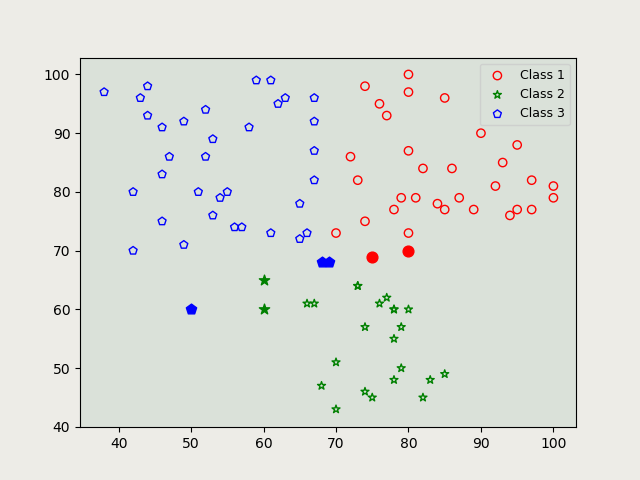

In [10]:
%matplotlib notebook

k = 4
print(df[k])
plot_classes(training_data, df[k])

#### k=10

Point\k
[50, 60]    Class 3
[60, 60]    Class 2
[80, 70]    Class 1
[60, 65]    Class 3
[69, 68]    Class 2
[68, 68]    Class 3
[75, 69]    Class 2
Name: 10, dtype: object


<IPython.core.display.Javascript object>


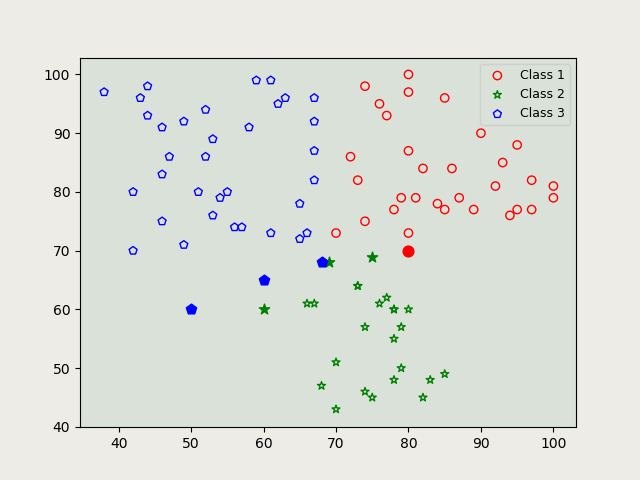

In [11]:
%matplotlib notebook

k = 10
print(df[k])
plot_classes(training_data, df[k])